In [1]:
!pip install matplotlib|

The syntax of the command is incorrect.


In [2]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Flatten,Dropout
from tensorflow.keras.layers import Dense,MaxPool2D,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Activation,Add
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam,Adagrad,Adadelta,Adamax,RMSprop
import os

In [3]:
dir="./UTKFace"

files=os.listdir(dir)

In [4]:
!pip install opencv-python

In [5]:
import cv2 as cv
ages=[]
genders=[]
images=[]

for fil in files:
    age=int(fil.split('_')[0])
    gender=int(fil.split('_')[1])
    ages.append(age)
    genders.append(gender)
    total=dir+'/'+fil
    image=cv.imread(total)
    image=cv.cvtColor(image,cv.COLOR_BGR2RGB)

    image=cv.resize(image,(48,48))
    images.append(image)

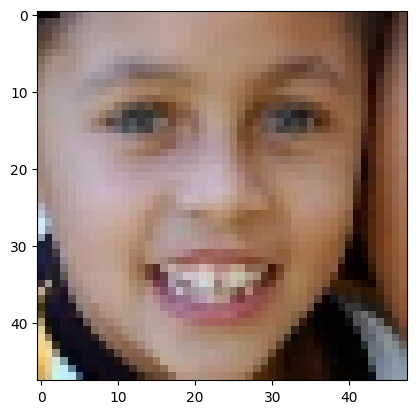

In [6]:
plt.imshow(images[100])

In [7]:
print(ages[100])

10


In [8]:
print(genders[100])

0


Age:56
Gender: Male


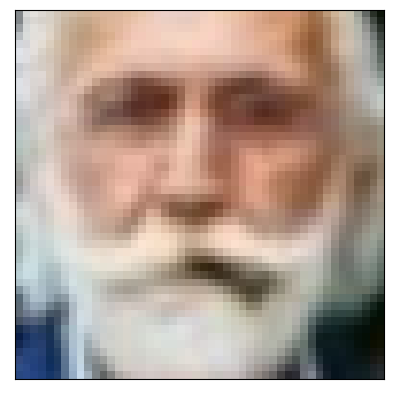

Age:26
Gender: Male


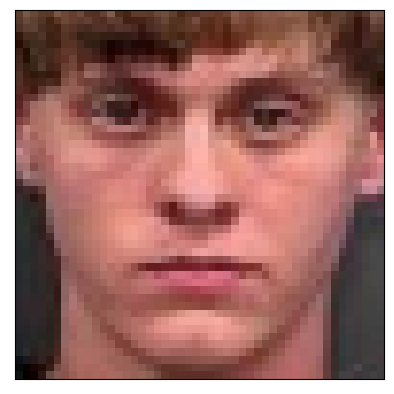

Age:1
Gender: Male


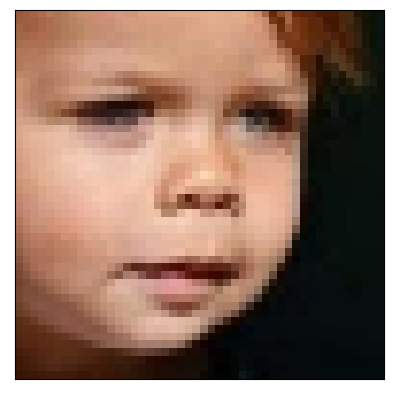

Age:38
Gender: Male


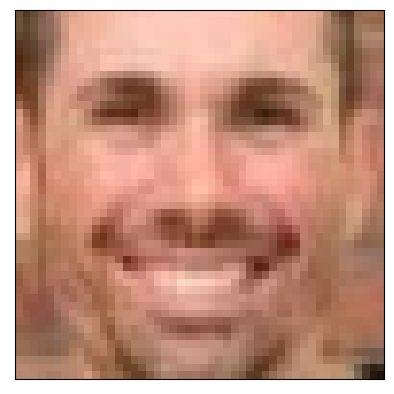

Age:26
Gender: Female


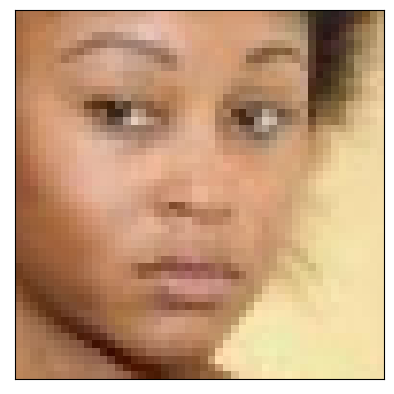

In [9]:
def showdemo(n):
    for i in np.random.randint(0,len(images),n):
        plt.imshow(images[i])
        plt.xticks([])
        plt.yticks([])

        print(f"Age:{ages[i]}")
        v=genders[i]
        if(v==1):
            print("Gender: Female")
        else: 
            print("Gender: Male")


        plt.show()  

showdemo(5)

In [10]:
images_arr=np.array(images)

ages_arr=np.array(ages)

gender_arr=np.array(genders)

In [11]:
np.save(dir+'images.npy',images_arr)
np.save(dir+'ages.npy',ages_arr)

np.save(dir+'genders.npy',gender_arr)

In [12]:
values,counts=np.unique(gender_arr,return_counts=True)

In [13]:
counts

array([12389, 11312], dtype=int64)

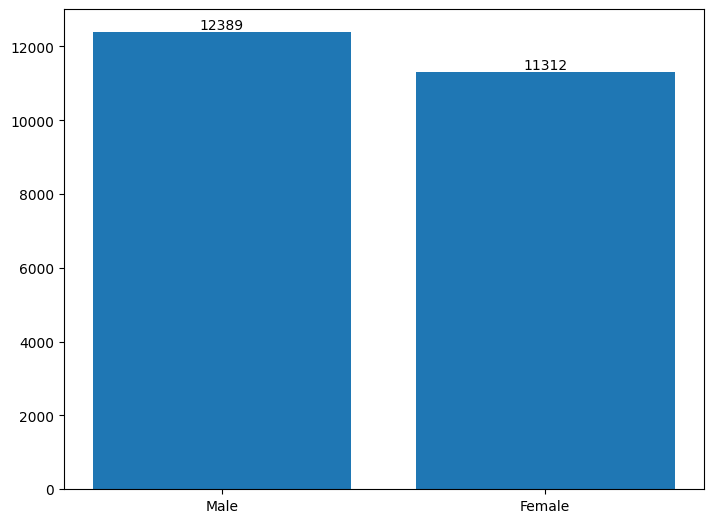

In [14]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
gender=['Male','Female']
value=counts
ax.bar(gender,value)
for i in range(len(gender)):
    ax.text(i,value[i]+1,str(value[i]),ha='center',va='bottom')
plt.show()

In [15]:
values,counts=np.unique(ages_arr,return_counts=True)
print(values)

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  95  96  99 100 101 103 105 110 111 115 116]


In [16]:
val=values.tolist()
count=counts.tolist()

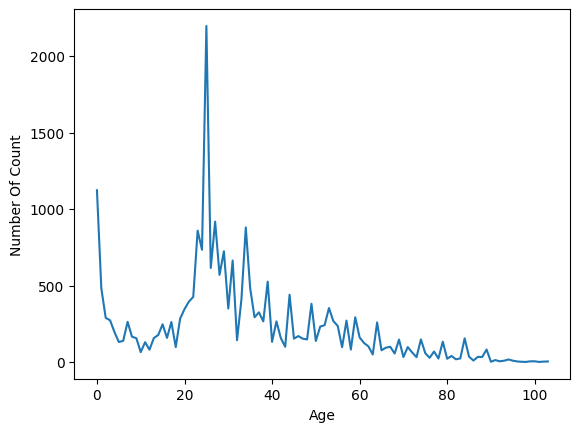

In [17]:
plt.plot(count)
plt.xlabel("Age")
plt.ylabel("Number Of Count")
plt.show()

In [18]:
images_arr1=images_arr/255.0

In [19]:
labels=[]
i=0

while i<len(ages):
    label=[]
    label.append(ages[i])
    label.append(genders[i])
    labels.append(label)

    i=i+1

In [20]:
labels_arr=np.array(labels)

In [21]:
!pip install scikit-learn

In [22]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(images_arr1,labels_arr,test_size=0.25)

In [23]:
Y_train[0:5]

array([[26,  0],
       [26,  0],
       [58,  0],
       [ 1,  1],
       [31,  1]])

In [24]:
Y_train2=(Y_train[:,1],Y_train[:,0])
Y_test2=(Y_test[:,1],Y_test[:,0])

In [25]:
print(Y_train2[0][0:5])
print(Y_train2[1][0:5])

[0 0 0 1 1]
[26 26 58  1 31]


## Defining The Model

In [26]:
def Conventional(input_tensor,filters):
    x=Conv2D(filters=filters,padding="same",kernel_size=(3,3),strides=(1,1),kernel_regularizer=l2(0.001))(input_tensor)
    x=Activation('relu')(x)
    x=Dropout(0.1)(x)
    return x

In [27]:
def models(input_shape):
    input = Input(shape=input_shape)
    
    conv_1 = Conventional(input, 32)
    max_1 = MaxPool2D(pool_size=(2, 2))(conv_1)
    
    conv_2 = Conventional(max_1, 64)
    max_2 = MaxPool2D(pool_size=(2, 2))(conv_2)
    
    conv_3 = Conventional(max_2, 128)
    max_3 = MaxPool2D(pool_size=(2, 2))(conv_3)
    
    conv_4 = Conventional(max_3, 264)
    max_4 = MaxPool2D(pool_size=(2, 2))(conv_4)
    
    conv_5 = Conventional(max_4, 512)
    max_5 = MaxPool2D(pool_size=(2, 2))(conv_5)
    
    flatten = Flatten()(max_5)
    
  
    dense_1 = Dense(64, activation='relu')(flatten)
    dense_2 = Dense(64, activation='relu')(flatten)
    
    dropout_1 = Dropout(0.2)(dense_1)
    dropout_2 = Dropout(0.2)(dense_2)
    
   
    output_1 = Dense(1, activation='sigmoid', name='sex_out')(dropout_1)  
    output_2 = Dense(1, activation='relu', name='age_out')(dropout_2)  
    
    
    model = Model(inputs=input, outputs=[output_1, output_2])
    
    
    model.compile(loss=['binary_crossentropy', 'mae'], optimizer='Adam', metrics=['accuracy'])
    
    return model

In [28]:
model_instance=models((48,48,3))

In [29]:
model_instance.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 48, 48, 3)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 48, 48, 32)   896         ['input_1[0][0]']                
                                                                                                  
 activation (Activation)        (None, 48, 48, 32)   0           ['conv2d[0][0]']                 
                                                                                                  
 dropout (Dropout)              (None, 48, 48, 32)   0           ['activation[0][0]']             
                                                                                              

## Initialization The Model

In [30]:
from tensorflow.keras.callbacks import ModelCheckpoint
flir='Age_Sex_detection1.h5'
checkpoint=ModelCheckpoint(flir,monitor='val_loss',verbose=1,save_best_only=True,save_weights_only=False,mode='auto',save_freq='epoch')
Early_stop=tf.keras.callbacks.EarlyStopping(patience=75,restore_best_weights='True')
callback_list=[checkpoint,Early_stop]

## Running The Model

In [31]:
History=model_instance.fit(X_train,Y_train2,batch_size=64,validation_data=(X_test,Y_test2),epochs=250,callbacks=callback_list)

Epoch 1/250
278/278 [==============================] - ETA: 0s - loss: 16.7159 - sex_out_loss: 0.7645 - age_out_loss: 15.6442 - sex_out_accuracy: 0.5125 - age_out_accuracy: 0.0473
Epoch 1: val_loss improved from inf to 17.09060, saving model to Age_Sex_detection1.h5
278/278 [==============================] - 87s 301ms/step - loss: 16.7159 - sex_out_loss: 0.7645 - age_out_loss: 15.6442 - sex_out_accuracy: 0.5125 - age_out_accuracy: 0.0473 - val_loss: 17.0906 - val_sex_out_loss: 0.6863 - val_age_out_loss: 16.1487 - val_sex_out_accuracy: 0.5226 - val_age_out_accuracy: 0.0472
Epoch 2/250
278/278 [==============================] - ETA: 0s - loss: 12.9302 - sex_out_loss: 0.6437 - age_out_loss: 11.9757 - sex_out_accuracy: 0.6187 - age_out_accuracy: 0.0455
Epoch 2: val_loss improved from 17.09060 to 13.38898, saving model to Age_Sex_detection1.h5
278/278 [==============================] - 82s 296ms/step - loss: 12.9302 - sex_out_loss: 0.6437 - age_out_loss: 11.9757 - sex_out_accuracy: 0.6187 -

In [33]:
model_instance.evaluate(X_test,Y_test2)

186/186 [==============================] - 4s 22ms/step - loss: 7.4416 - sex_out_loss: 0.2562 - age_out_loss: 5.9666 - sex_out_accuracy: 0.8910 - age_out_accuracy: 0.0452


[7.441576957702637,
 0.25616171956062317,
 5.96658182144165,
 0.8909888863563538,
 0.04522443562746048]

In [34]:
pred=model_instance.predict(X_test)

186/186 [==============================] - 5s 22ms/step


In [35]:
pred[1]

array([[26.119007 ],
       [20.916878 ],
       [24.675007 ],
       ...,
       [ 6.4285836],
       [29.53562  ],
       [11.312312 ]], dtype=float32)

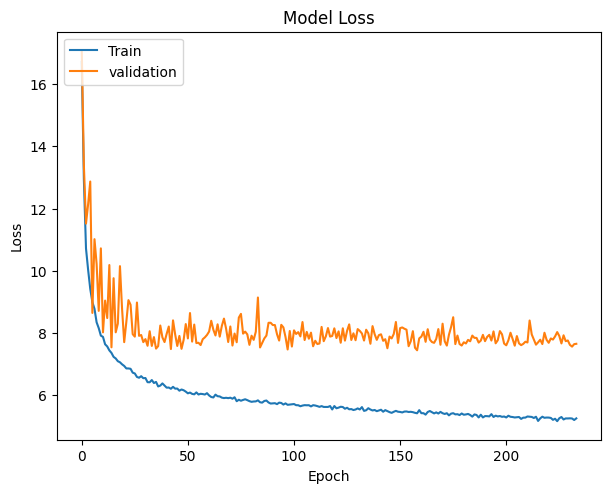

In [36]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.legend(['Train','validation'],loc='upper left')

plt.subplots_adjust(top=0.95,bottom=0.1,left=0.1,right=0.95)
plt.show()

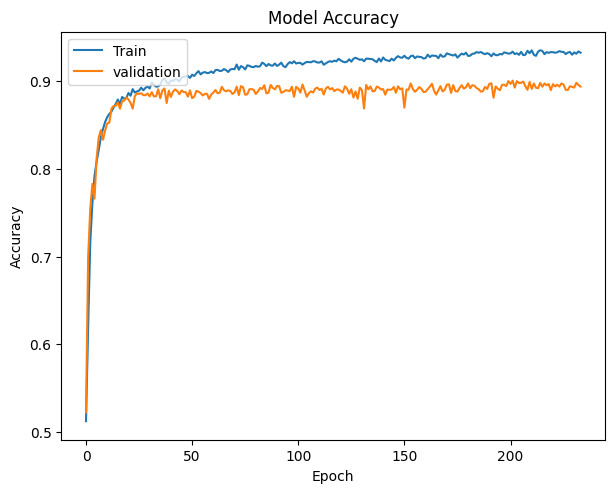

In [37]:
plt.plot(History.history['sex_out_accuracy'])
plt.plot(History.history['val_sex_out_accuracy'])

plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(['Train','validation'],loc='upper left')

plt.subplots_adjust(top=0.95,bottom=0.1,left=0.1,right=0.95)
plt.show()

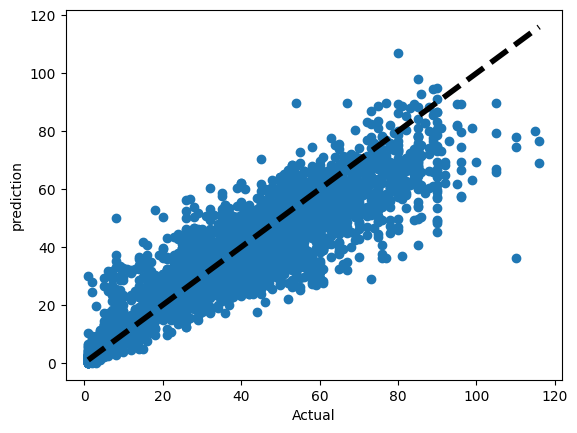

In [38]:
fig,ax=plt.subplots()
ax.scatter(Y_test2[1],pred[1])
ax.plot([Y_test2[1].min(),Y_test2[1].max()],[Y_test2[1].min(),Y_test2[1].max()],'k--',lw=4)

plt.xlabel("Actual")
plt.ylabel("prediction")
plt.show()

In [39]:
i=0
pred_l=[]
while i<len(pred[0]):
    pred_l.append(int(np.round(pred[0][i])))
    i=i+1

In [40]:
from sklearn.metrics import classification_report,confusion_matrix

report=classification_report(Y_test2[0],pred_l)
print(report)

              precision    recall  f1-score   support

           0       0.90      0.89      0.89      3105
           1       0.88      0.90      0.89      2821

    accuracy                           0.89      5926
   macro avg       0.89      0.89      0.89      5926
weighted avg       0.89      0.89      0.89      5926



In [41]:
!pip install seaborn

<AxesSubplot:>

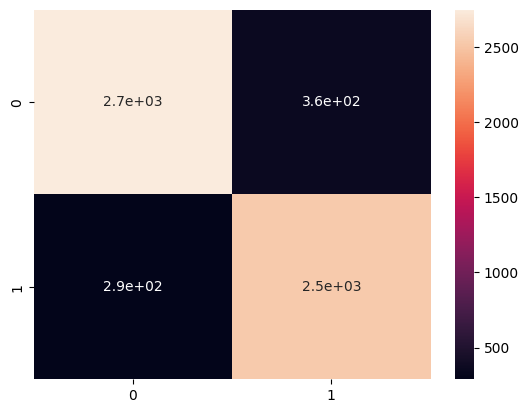

In [42]:
result=confusion_matrix(Y_test2[0],pred_l)  
import seaborn as sns
sns.heatmap(result,annot=True)

## Tesing The Model

In [43]:
def testing(index,images_arr,images_arr1,model_instance):
    plt.imshow(images_arr[index])
    image_test=images_arr1[index]
    pre=model_instance.predict(np.array([image_test]))
    gender=['Male','Female']
    age=int(np.round(pre[1][0]))
    sex=int(np.round(pre[0][0]))
    print("Predict Age "+ str(age))
    print("Predict Gender "+ gender[sex])

1/1 [==============================] - 0s 34ms/step
Predict Age 13
Predict Gender Male


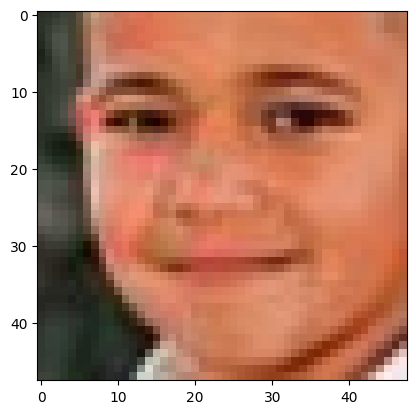

In [44]:
testing(83,images_arr,images_arr1,model_instance)